In [38]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import pySuStaIn

sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

In [40]:


csv_dir = '/home/ccchen/Documents/dr_chang/ai_tau_20211101.csv'
pre_df = pd.read_csv(csv_dir)
df = pre_df[['Frontal','Temporal','Occipital','Parietal','Thalamus','Caudate','Putamen','Pallidum','S_nigra','Midbrain','Cerebellum_Crus','GM']]
print(pre_df.shape, df.shape)
df.describe()

(276, 18) (276, 12)


,Frontal,Temporal,Occipital,Parietal,Thalamus,Caudate,Putamen,Pallidum,S_nigra,Midbrain,Cerebellum_Crus,GM
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.423913,0.920290,1.014493,2.097826,1.148551,1.380435,1.144928,1.054348,0.927536,0.923913,1.355072,0.706522
std,0.691250,0.903018,0.831083,0.923154,0.750538,0.992800,0.768003,0.621391,0.567453,0.619097,0.825068,0.811795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


Although one point will not affect the result, notice that in this csv we already remove the "avg" row.

In [41]:
df_numpy = df.to_numpy()
df_mean = np.mean(df_numpy,axis=0,keepdims=True)
df_std = np.std(df_numpy,axis=0,keepdims=True)
print(df_mean,df_std)

[[1.42391304 0.92028986 1.01449275 2.09782609 1.14855072 1.38043478
  1.14492754 1.05434783 0.92753623 0.92391304 1.35507246 0.70652174]] [[0.68999626 0.90138054 0.82957565 0.92148017 0.74917689 0.99099999
  0.7666105  0.62026404 0.56642383 0.61797406 0.82357232 0.81032347]]


In [42]:
df_normal = (df_numpy -df_mean)/df_std
print(np.mean(df_normal,axis =0),np.std(df_normal,axis=0))

[-1.54465812e-16 -7.72329061e-17 -7.72329061e-17 -1.54465812e-16
 -1.44811699e-17  9.01050571e-17  5.14886040e-17 -1.60901888e-17
 -7.72329061e-17  7.07968306e-17 -3.53984153e-17 -5.14886040e-17] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [43]:
N                       = df_normal.shape[1]         # number of biomarkers
M                       = df_normal.shape[0]         # number of observations ( e.g. subjects )
#N_S_gt                  = 4                          # number of ground truth subtypes
SuStaInLabels           = ['Frontal','Temporal','Occipital','Parietal','Thalamus','Caudate','Putamen','Pallidum','S_nigra','Midbrain','Cerebellum_Crus','GM']
#for i in range(N):
#        SuStaInLabels.append( 'Biomarker '+str(i)) 
Z_vals                  = np.array([[1,2,3]]*N)     # Z-scores for each biomarker
Z_max                   = np.array([5]*N)    

N_startpoints           = 25                        #The number of startpoints to use when fitting the subtypes hierarchichally. Using 25 from the author's suggestion.
N_S_max                 = 3                         #The maximum number of subtypes to fit
N_iterations_MCMC       = int(1e5)                  #The number of iterations for the MCMC sampling of the uncertainty in the progression pattern. using 1e5 or 1e6 by the author's suggestion.
output_folder = os.path.join(os.getcwd(), 'sim')
dataset_name = 'sim'
sustain_input = pySuStaIn.ZscoreSustain(df_normal,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              False)
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

In [44]:
# runs the sustain algorithm with the inputs set in sustain_input above
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()


Found pickle file: /home/ccchen/projects/pySuStaIn/notebooks/sim/pickle_files/sim_subtype0.pickle. Using pickled variables for 0 subtype.
Found pickle file: /home/ccchen/projects/pySuStaIn/notebooks/sim/pickle_files/sim_subtype1.pickle. Using pickled variables for 1 subtype.
Found pickle file: /home/ccchen/projects/pySuStaIn/notebooks/sim/pickle_files/sim_subtype2.pickle. Using pickled variables for 2 subtype.


In [45]:

df['subtype']=pd.Series(ml_subtype[:,0])

df['stage'] = pd.Series(ml_stage[:,0])

#df=df.sort_values(['subtype', 'stage'])

#save_dir = '/home/ccchen/Documents/dr_chang/ai_tau_3_cluster_no_sort.csv'
#df.to_csv(save_dir)

/home/ccchen/miniconda3/envs/dl_37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ccchen/miniconda3/envs/dl_37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


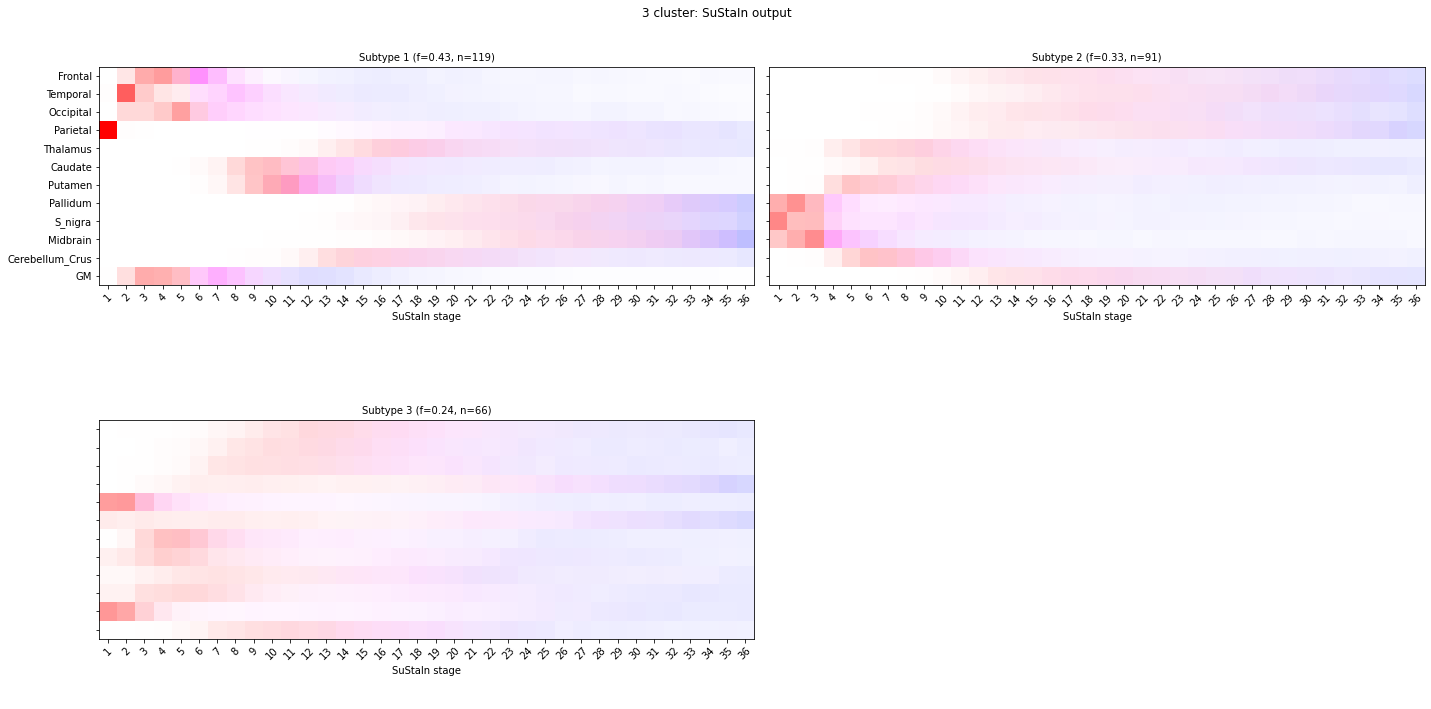

In [46]:

# The code below opens the results for the ground truth number of subtypes
# and plots the output
s = N_S_max-1

pickle_filename_s           = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pickle_filepath             = Path(pickle_filename_s)
pickle_file                 = open(pickle_filename_s, 'rb')
loaded_variables            = pickle.load(pickle_file)
samples_sequence            = loaded_variables["samples_sequence"]
samples_f                   = loaded_variables["samples_f"]


pickle_file.close()


pySuStaIn.ZscoreSustain._plot_sustain_model(sustain_input,samples_sequence,samples_f,M)
_ = plt.suptitle('3 cluster: SuStaIn output')




event number (by default) = (number of stages) * (number of biomakers)
intuitively, events corresponds to 'the severity of some biomaker increases' 
to interpret the following figures, rgb represents the severity score (1,2,3)
, and the light <-> dark represents the portion of 



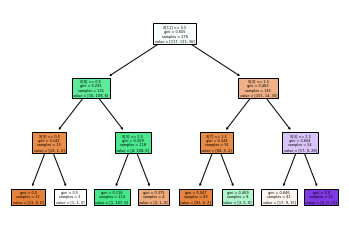

In [48]:
df_np = df.to_numpy()

label = df['subtype'].to_numpy()
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth =3)
clf = clf.fit(df_np[:,:df_np.shape[1]-2], label)
import matplotlib.pyplot as plt

plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('tree.eps',format='eps',bbox_inches = "tight")

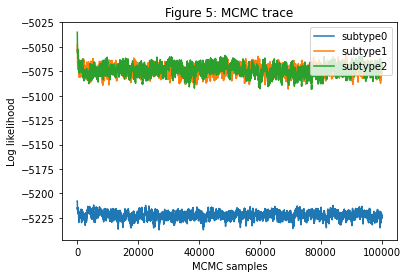

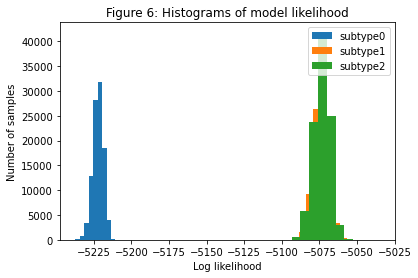

In [9]:
# go through each subtypes model and plot MCMC samples of the likelihood
for s in range(N_S_max):
    pickle_filename_s           = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
    pickle_filepath             = Path(pickle_filename_s)
    pickle_file                 = open(pickle_filename_s, 'rb')
    loaded_variables            = pickle.load(pickle_file)
    samples_likelihood          = loaded_variables["samples_likelihood"]
    pickle_file.close()

    _ = plt.figure(0)
    _ = plt.plot(range(N_iterations_MCMC), samples_likelihood, label="subtype" + str(s))
    _ = plt.figure(1)
    _ = plt.hist(samples_likelihood, label="subtype" + str(s))
    
_ = plt.figure(0)
_ = plt.legend(loc='upper right')
_ = plt.xlabel('MCMC samples')
_ = plt.ylabel('Log likelihood')
_ = plt.title('Figure 5: MCMC trace')
    
_ = plt.figure(1)
_ = plt.legend(loc='upper right')
_ = plt.xlabel('Log likelihood')  
_ = plt.ylabel('Number of samples')  
_ = plt.title('Figure 6: Histograms of model likelihood')